# MODELO  NO SUPERVISADO 

In [3]:
# Se importan las librerías que se utilizarán: 
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import re
import array
import warnings
warnings.filterwarnings('ignore')
from matplotlib.cm import viridis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
# Se carga el data set
electrica=pd.read_csv(r'..\\datasets\\electrica.csv')  

In [5]:
# Se verifica el tipo de dato de cada columna
electrica. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     511 non-null    int64  
 1   country                                  511 non-null    object 
 2   electricity_generation                   511 non-null    float64
 3   biofuel_electricity                      511 non-null    float64
 4   coal_electricity                         511 non-null    float64
 5   fossil_electricity                       511 non-null    float64
 6   gas_electricity                          511 non-null    float64
 7   hydro_electricity                        511 non-null    float64
 8   nuclear_electricity                      511 non-null    float64
 9   oil_electricity                          511 non-null    float64
 10  other_renewable_electricity              511 non-n

In [6]:
# Se verifica que no hayan valores nulos
electrica.isna().sum()

year                                       0
country                                    0
electricity_generation                     0
biofuel_electricity                        0
coal_electricity                           0
fossil_electricity                         0
gas_electricity                            0
hydro_electricity                          0
nuclear_electricity                        0
oil_electricity                            0
other_renewable_electricity                0
other_renewable_exc_biofuel_electricity    0
renewables_electricity                     0
solar_electricity                          0
wind_electricity                           0
energy_per_gdp                             0
energy_per_capita                          0
dtype: int64

In [7]:
# Se visualiza los valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(suram2.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.xlabel('Columnas')
plt.ylabel('Nulos')
plt.show()

NameError: name 'suram2' is not defined

<Figure size 1000x600 with 0 Axes>

Debido a que los países latinos selecionados no poseen información sobre la producción de electricidad proveniente del carbón se eliminará la columna.

In [121]:
# Se realizan códigos para la columna country que posee variables cualitativas
map_gender = {'Argentina': 1, 'Bolivia':2, 'Brazil':3, 'Chile':4, 'Colombia':5, 'Ecuador':6,'French Guiana':7, 'Guyana':8, 'Paraguay':9, 'Peru':10, 'Suriname':11,'Trinidad and Tobago':12, 'Uruguay':13, 'Venezuela':14}
electrica['country'] =electrica['country'].replace(map_gender)

In [8]:
print(electrica.columns)

Index(['year', 'country', 'electricity_generation', 'biofuel_electricity',
       'coal_electricity', 'fossil_electricity', 'gas_electricity',
       'hydro_electricity', 'nuclear_electricity', 'oil_electricity',
       'other_renewable_electricity',
       'other_renewable_exc_biofuel_electricity', 'renewables_electricity',
       'solar_electricity', 'wind_electricity', 'energy_per_gdp',
       'energy_per_capita'],
      dtype='object')


In [115]:
# Se observan los datos numericos, para proceder a normalizarloss
electrica.describe()

,year,country,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,2001.753425,7.471624,85.445912,5.958861,146.996239,172.160532,17.081706,41.144986,12.915965,8.082613,2.342299,0.023650,47.392714,1.033726,2.871656,1.958937,22197.360654
std,10.548946,4.043232,359.409041,23.361200,807.005258,877.210321,45.640541,98.068798,63.755005,27.830814,9.097475,0.108272,130.671052,11.771834,22.170455,1.836780,28404.635354
min,1984.000000,1.000000,0.044000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524000,2484.454000
25%,1993.000000,4.000000,4.335000,0.000000,0.000000,0.247500,0.000000,0.800000,0.000000,0.042000,0.000000,0.000000,0.843000,0.000000,0.000000,1.043000,8817.709000
50%,2002.000000,7.000000,16.929000,0.041000,0.000000,5.281000,1.922000,10.543000,0.000000,0.701000,0.102000,0.000000,11.838000,0.000000,0.000000,1.240000,16044.719000
75%,2011.000000,11.000000,62.564000,0.886000,2.644500,22.465000,11.641500,33.952000,0.000000,4.977000,0.901000,0.000000,36.049000,0.007000,0.020000,1.759500,23163.111000
max,2020.000000,14.000000,7623.696000,129.640000,4631.215000,5044.957000,253.425000,1355.200000,366.200000,160.317000,129.740000,0.610000,2212.540000,261.100000,466.500000,10.055000,176106.743000


In [ ]:
#Calcular el rango intercuartílico (IQR)
Q1 = suram1['hydro_share_elec'].quantile(0.25)
Q3 = suram1['hydro_share_elec'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = (suram1['hydro_share_elec'] < lower_bound) | (suram1['hydro_share_elec'] > upper_bound)
x = suram1[~outliers]

In [116]:
maximos_por_columna = electrica.max()
# Mostrar los resultados
print("Valores máximos por columna:")
print(maximos_por_columna)

Valores máximos por columna:
year                                         2020.000
country                                        14.000
electricity_generation                       7623.696
biofuel_electricity                           129.640
coal_electricity                             4631.215
fossil_electricity                           5044.957
gas_electricity                               253.425
hydro_electricity                            1355.200
nuclear_electricity                           366.200
oil_electricity                               160.317
other_renewable_electricity                   129.740
other_renewable_exc_biofuel_electricity         0.610
renewables_electricity                       2212.540
solar_electricity                             261.100
wind_electricity                              466.500
energy_per_gdp                                 10.055
energy_per_capita                          176106.743
dtype: float64


In [117]:
#Se escalan los datos
p1_scal = (suram2-suram2.min())/(suram2.max()-suram2.min())
p1_scal

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,0.000000,0.035714,0.052696,0.018472,0.075936,0.047676,0.262611,0.257279,0.063385,0.0,...,0.395941,0.037781,0.006873,0.000000,0.004671,0.000194,0.001538,0.000025,0.000000,0.000083
1,0.008333,0.035714,0.052696,0.018472,0.075936,0.047676,0.308829,0.257279,0.063385,0.0,...,0.395941,0.037781,0.007166,0.000000,0.004671,0.000194,0.001538,0.000025,0.000000,0.000083
2,0.016667,0.035714,0.052696,0.018472,0.075936,0.047676,0.308829,0.257279,0.063385,0.0,...,0.395941,0.037781,0.007009,0.000000,0.004671,0.000194,0.001538,0.000025,0.000000,0.000083
3,0.025000,0.035714,0.052696,0.018472,0.075936,0.047676,0.308829,0.257279,0.063385,0.0,...,0.395941,0.037781,0.008075,0.000000,0.004671,0.000194,0.001538,0.000025,0.000000,0.000083
4,0.033333,0.035714,0.052696,0.018472,0.075936,0.047676,0.308829,0.257279,0.063385,0.0,...,0.395941,0.037781,0.008982,0.000000,0.004671,0.000194,0.001538,0.000025,0.000000,0.000083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,0.958333,0.035761,0.052706,0.022805,0.122422,0.049981,0.279870,0.232584,0.044385,0.0,...,0.000597,0.000789,0.151549,0.001488,0.005141,0.000000,0.001569,0.000003,0.001508,0.000015
1298,0.966667,0.018128,0.049167,0.020755,0.088694,0.045728,0.176920,0.198851,0.015161,0.0,...,0.000599,0.000903,0.124180,0.001687,0.000000,0.000000,0.001506,0.000000,0.001520,0.000000
1299,0.975000,0.034831,0.052607,0.020838,0.090792,0.045459,0.185039,0.226882,0.042169,0.0,...,0.000609,0.000909,0.124180,0.001761,0.000000,0.000000,0.001538,0.000000,0.001544,0.000000
1300,0.983333,0.018222,0.050959,0.016463,0.000000,0.035951,0.014695,0.170744,0.000000,0.0,...,0.000533,0.000817,0.124180,0.001811,0.000000,0.000000,0.001538,0.000000,0.001571,0.000000


In [139]:
# Se seleccionan las variables a analizar
x=p1_scal[['solar_share_elec', 'energy_per_capita']].values
pd.DataFrame(x).head(5)

,0,1
0,0.46352,0.182882
1,0.46352,0.182882
2,0.46352,0.182882
3,0.46352,0.182882
4,0.46352,0.182882


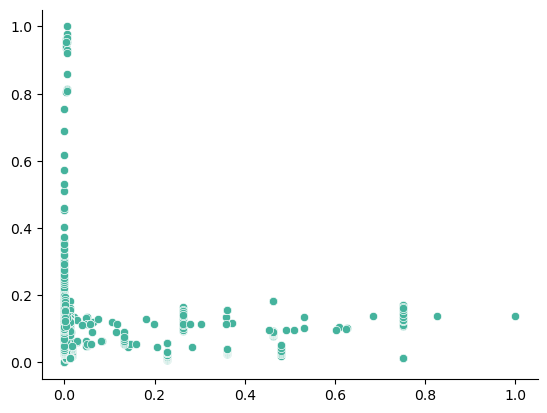

In [140]:
sns.scatterplot(x = x[:,0], y = x[:,1], color='#45B39D')
sns.despine()
plt.show()

## Método del codo:
Se realiza el método del codo para conocer los posibles clusters en que se clasificará el modelo. Dependiendo delos valores que arroje se realizarán las pruebas pertinentes.



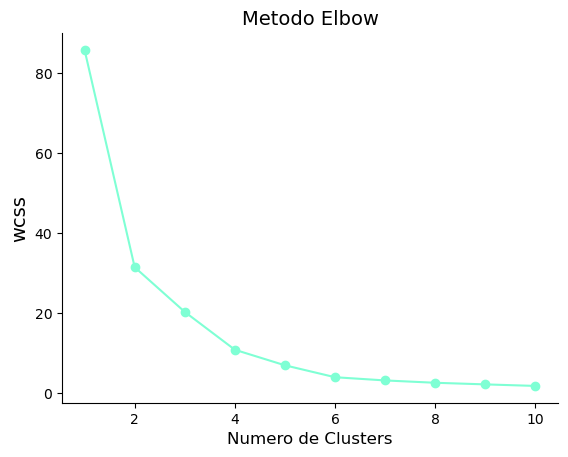

In [141]:
#Se realiza el método del codo para determinar la cantidad de clusters
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, marker='o',c="#7FFFD4")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

Se observa que el grafico arroja un numero de clusters que esta entre 2, 3 y 4 que son los puntos en donde se aprecia que comienza a disminuir bruscamente (punto de quiebre) la variación. A contnuación se verificarán los tres tipos de números de clusters para determinar cual tiene mejor desempeño.

## Cantidad de clusters: 4

In [142]:
# Se instancia el modelo con el numero de clusters=4
kmeansmodel4 = KMeans(n_clusters=4, random_state=0)
kmeansmodel4.fit(x)
KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=4, random_state=0)

In [95]:
# Se realizan las etiquetas de los clusters
etiquetas_4 = kmeansmodel4.labels_
np.unique(etiquetas_4)

array([0, 1, 2, 3])

In [143]:
# Se realiza la predicción:
y_means4=kmeansmodel4.fit_predict(x)

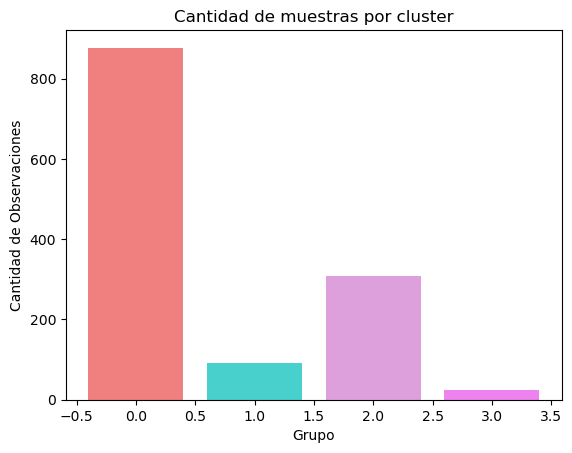

In [144]:
#Se verifica la cantidad de observaciones (4 clusters)
cluster_counts = np.bincount(y_means4)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum', 'violet']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 4 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en las otras posibilidades de cantidad de clusters.

In [145]:
# Se observan las coordenandas de los centroides
centroids4 =kmeansmodel4.cluster_centers_
print(centroids4)

[[0.0093203  0.0914782 ]
 [0.74813733 0.04782157]
 [0.35419859 0.10747005]
 [0.00317636 0.77850469]]


## Cantidad de clusters: 3

In [146]:
# Se instancia el modelo con el numero de clusters=3
kmeansmodel3 = KMeans(n_clusters=3, random_state=0)
kmeansmodel3.fit(x)
KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=3, random_state=0)

In [147]:
# Se realizan las etiquetas de los clusters
etiquetas_3 = kmeansmodel3.labels_
np.unique(etiquetas_3)

array([0, 1, 2])

In [148]:
# Se realiza la predicción:
y_means3=kmeansmodel3.fit_predict(x)

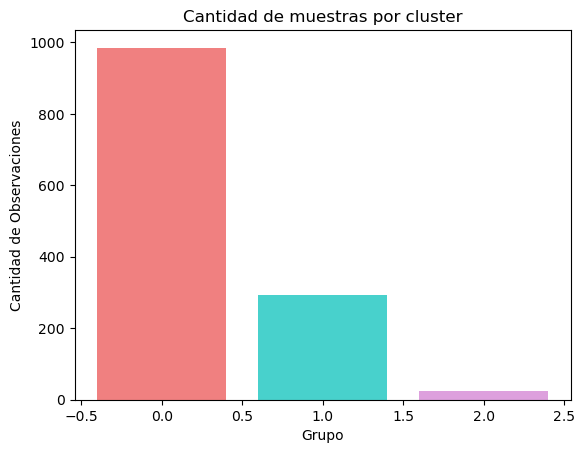

In [149]:
#Se verifica la cantidad de observaciones (3 clusters)
cluster_counts = np.bincount(y_means3)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 3 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en las otras posibilidades de cantidad de clusters.

In [150]:
# Se observan las coordenandas de los centroides
centroids3 =kmeansmodel3.cluster_centers_
print(centroids3)

[[0.03392381 0.08848338]
 [0.52230358 0.10470334]
 [0.00317636 0.77850469]]


## Cantidad de clusters: 2

In [151]:
# Se instancia el modelo con el numero de clusters=2
kmeansmodel2 = KMeans(n_clusters=2, random_state=0)
kmeansmodel2.fit(x)
KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=2, random_state=0)

In [152]:
# Se realizan las etiquetas de los clusters
etiquetas_2 = kmeansmodel2.labels_
np.unique(etiquetas_2)

array([0, 1])

In [153]:
# Se realiza la predicción:
y_means2=kmeansmodel2.fit_predict(x)

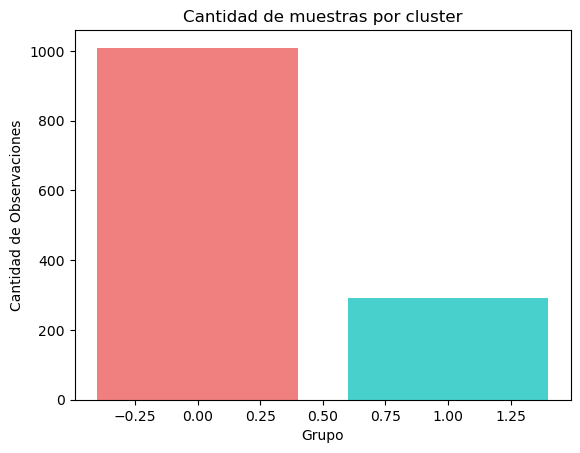

In [154]:
#Se verifica la cantidad de observaciones (3 clusters)
cluster_counts = np.bincount(y_means2)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 2 clusters es similar en cada grupo. 

In [155]:
# Se observan las coordenandas de los centroides
centroids2 =kmeansmodel2.cluster_centers_
print(centroids2)

[[0.0334361  0.10490542]
 [0.52313587 0.1046707 ]]


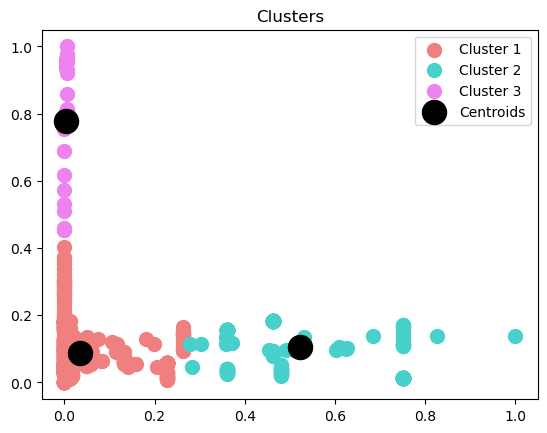

In [156]:
# 
plt.scatter(x[y_means3 == 0, 0], x[y_means3 == 0, 1], s = 100, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(x[y_means3 == 1, 0], x[y_means3 == 1, 1], s = 100, c = 'mediumturquoise', label = 'Cluster 2')
plt.scatter(x[y_means3 == 2, 0], x[y_means3 == 2, 1], s = 100, c = 'violet', label = 'Cluster 3')
plt.scatter(kmeansmodel3.cluster_centers_[:, 0], kmeansmodel3.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

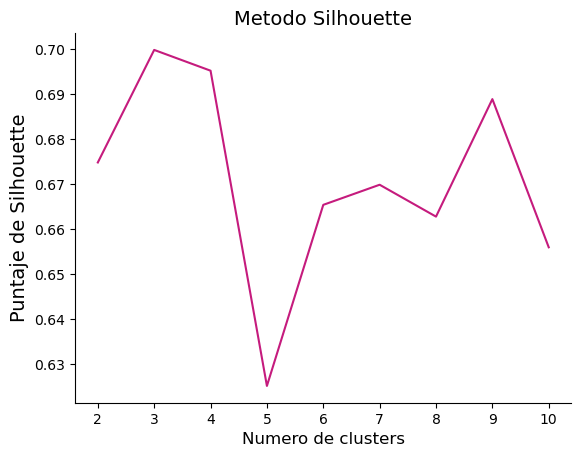

In [157]:
# Se realiza la evaluación con silhoutte
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(x)
    labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric='euclidean'))
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_1 = DBSCAN(eps=0.3, min_samples=10)

In [ ]:
dbscan_1.fit(x)

In [ ]:
# Consultamos las etiquetas
labels_1 = dbscan_1.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_1 = list(labels_1).count(-1)

In [ ]:
def plot_DBSCAN(x,labels_1,db_1,n_clusters_1):
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
        for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:col = [0, 0, 0, 1]
        class_member_mask = (labels_1 == k)
        xy = x[class_member_mask & core_samples_mask_1]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
xy

 = x[class_member_mask & ~core_samples_mask_1]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)
plt.title('Numero estimado de clusters: %d' % n_clusters_1)
plt.show()

In [ ]:
print('Numero estimado de clusters: %d' % n_clusters_1)
print('Numero estimado de puntos outliers: %d' % n_noise_1)